In [2]:
%matplotlib notebook

In [3]:
import collections
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def readfile(path, constraint=None):
    out = collections.defaultdict(list)
    with open(path) as f:
        for line in f:
            idx, tok, vocab_count, knn_count = line.strip().split()
            idx, vocab_count, knn_count = \
                int(idx), int(vocab_count), int(knn_count)
            if constraint is not None:
                if idx not in constraint:
                    continue
            out['idx'].append(idx)
            out['tok'].append(tok)
            out['vc'].append(vocab_count)
            out['kc'].append(knn_count)
    for k in ['kc', 'vc']:
        out[k] = np.asarray(out[k]).astype(np.float32)
    return out
            
def downsample(d, n=10000):
    keys = list(d.keys())
    index = np.arange(len(d[keys[0]]))
    np.random.shuffle(index)
    index = index[:n]
    
    for k in keys:
        if isinstance(d[k], list):
            d[k] = [d[k][i] for i in index]
        else:
            d[k] = d[k][index]
            
    return d

np.random.seed(11)
path = './data/knn_count.txt'
data = readfile(path)
print(len(data['tok']))

data = downsample(data, n=10000)
print(len(data['tok']))

constraint = set(data['idx'])
tp = readfile('./data/tp_count.txt', constraint)
print(len(tp['tok']))
fp = readfile('./data/fp_count.txt', constraint)
print(len(fp['tok']))
npos = readfile('./data/npos_count.txt', constraint)
print(len(npos['tok']))

225045
10000
1456
9996
2191


<IPython.core.display.Javascript object>


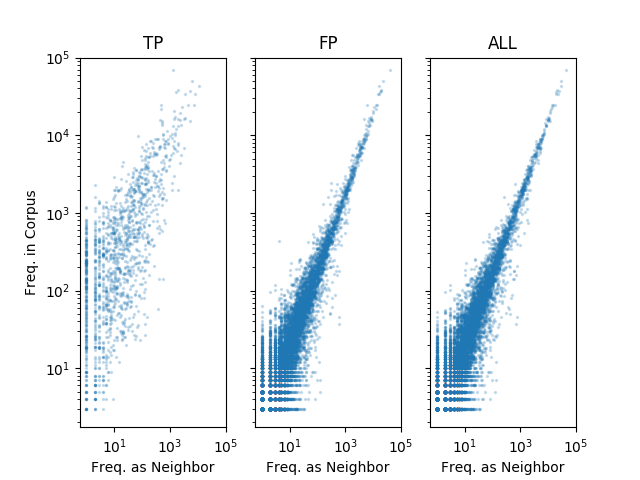

<IPython.core.display.Javascript object>


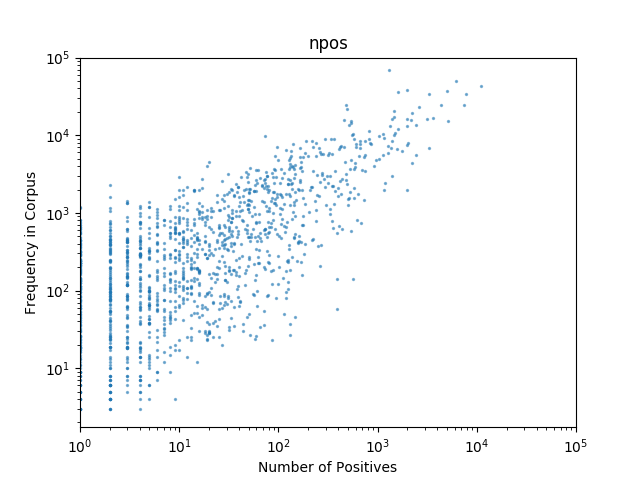

<IPython.core.display.Javascript object>


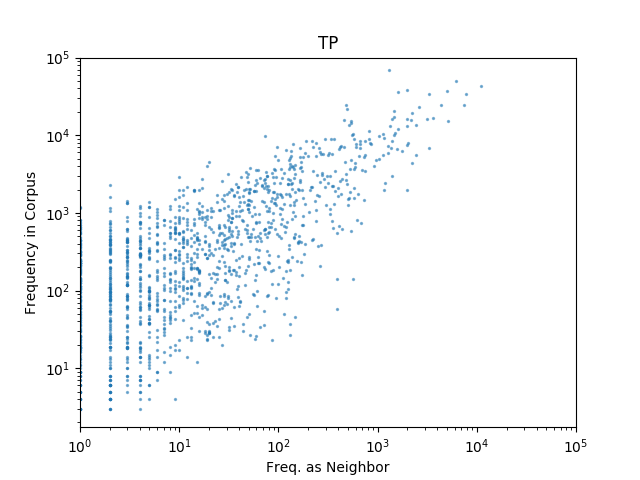

In [5]:
fig, axs = plt.subplots(1, 3)
axs[0].scatter(tp['kc'], tp['vc'], s=2, alpha=0.2)
axs[0].set_title('TP')

axs[1].scatter(fp['kc'], fp['vc'], s=2, alpha=0.2)
axs[1].set_title('FP')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlim(xmax=10**5)
axs[1].set_ylim(ymax=10**5)

axs[2].scatter(data['kc'], data['vc'], s=2, alpha=0.2)
axs[2].set_title('ALL')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
axs[2].set_xlim(xmax=10**5)
axs[2].set_ylim(ymax=10**5)

for ax in fig.get_axes():
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(xmax=10**5)
    ax.set_ylim(ymax=10**5)
    ax.set_ylabel('Freq. in Corpus')
    ax.set_xlabel('Freq. as Neighbor')
    ax.label_outer()

plt.show()


plt.figure()
plt.scatter(npos['kc'], npos['vc'], s=2, alpha=0.5)
plt.title('npos')
plt.xlabel('Number of Positives')
plt.ylabel('Frequency in Corpus')
plt.yscale('log')
plt.xscale('log')
plt.ylim(ymax=10**5)
plt.xlim(xmin=1, xmax=10**5)
plt.show()

plt.figure()
plt.scatter(tp['kc'], tp['vc'], s=2, alpha=0.5)
plt.title('TP')
plt.xlabel('Freq. as Neighbor')
plt.ylabel('Frequency in Corpus')
plt.yscale('log')
plt.xscale('log')
plt.ylim(ymax=10**5)
plt.xlim(xmin=1, xmax=10**5)
plt.show()

# plt.figure()
# plt.title('False Positive')
# plt.scatter(fp['kc'], fp['vc'], s=2, alpha=0.5)
# plt.xlabel('Frequency as Neighbor')
# plt.ylabel('Frequency in Corpus')
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(ymax=10**5)
# plt.xlim(xmax=10**5)
# plt.show()

# plt.figure()
# plt.title('All')
# plt.scatter(data['kc'], data['vc'], s=2, alpha=0.5)
# plt.xlabel('Frequency as Neighbor')
# plt.ylabel('Frequency in Corpus')
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(ymax=10**5)
# plt.xlim(xmax=10**5)
# plt.show()

In [100]:
TODO = """
- [ ] (?) Similar, but only unique counts.
- [x] Number of positives X word frequency. (This is the same as TP you silly goof).
- [ ] Show upper bound improvement X word frequency. (more work)
- [ ] Add coloring based on part of speech.
- [ ] Run this analysis on validation instead of train you silly person!
"""

In [8]:
def readfile(path):
    out = collections.defaultdict(list)
    with open(path) as f:
        for i, line in enumerate(f):
            if i == 0:
                keys = line.strip().split() # ['sym', 'tf', 'tf_as_key', 'kf']
                continue
            vals = line.strip().split()
            for k, v in zip(keys, vals):
                out[k].append(v)
    for k in ['tf', 'tf_as_key', 'kf']:
        out[k] = np.asarray([int(x) for x in out[k]], dtype=np.int)
    return out
path = './data/tf_by_kf_by_uniq.txt'
data = readfile(path)

<IPython.core.display.Javascript object>


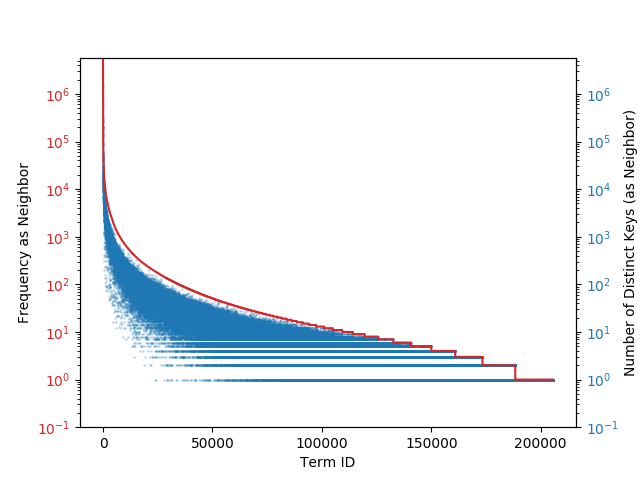

In [50]:
tf, tf_as_key, kf = data['tf'], data['tf_as_key'], data['kf']

index = np.argsort(tf_as_key)[::-1]
tf = tf[index]
tf_as_key = tf_as_key[index]
kf = kf[index]
xs = np.arange(index.shape[0])


fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(xs, tf_as_key, alpha=1, color=color)
ax1.set_yscale('log')
ax1.set_ylim(ymin=0.1, ymax=tf_as_key.max())
ax1.set_ylabel('Frequency as Neighbor')
ax1.tick_params(axis='y', labelcolor=color)


color = 'tab:blue'
ax2 = ax1.twinx()
ax2.scatter(xs, kf, s=1, alpha=0.2, color=color)
ax2.set_yscale('log')
ax2.set_ylim(ymin=0.1, ymax=tf_as_key.max())
ax2.set_ylabel('Number of Distinct Keys (as Neighbor)')
ax2.tick_params(axis='y', labelcolor=color)
# fix zorder
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
ax1.set_xlabel('Term ID')
plt.show()

# plt.figure()
# plt.scatter(xs, kf, s=1, alpha=0.2)
# plt.plot(xs, tf_as_key, alpha=1, color='red')
# plt.yscale('log')
# plt.ylim(ymax=tf_as_key.max())
# plt.xlabel('Term ID')
# # plt.ylabel('Frequency as Neighbor')
# # plt.xlabel('Number of Distinct Keys (as Neighbor)')
# plt.show()

<IPython.core.display.Javascript object>


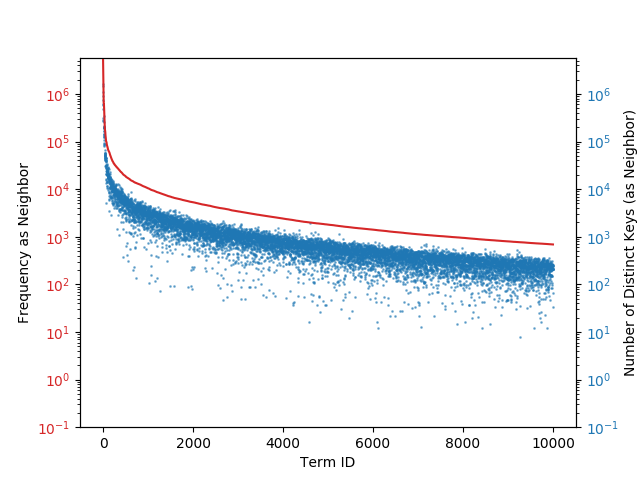

In [49]:
tf, tf_as_key, kf = data['tf'], data['tf_as_key'], data['kf']

index = np.argsort(tf_as_key)[::-1][:10000]
tf = tf[index]
tf_as_key = tf_as_key[index]
kf = kf[index]
xs = np.arange(index.shape[0])


fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(xs, tf_as_key, alpha=1, color=color)
ax1.set_yscale('log')
ax1.set_ylim(ymin=0.1, ymax=tf_as_key.max())
ax1.set_ylabel('Frequency as Neighbor')
ax1.tick_params(axis='y', labelcolor=color)


color = 'tab:blue'
ax2 = ax1.twinx()
ax2.scatter(xs, kf, s=1, alpha=0.5, color=color)
ax2.set_yscale('log')
ax2.set_ylim(ymin=0.1, ymax=tf_as_key.max())
ax2.set_ylabel('Number of Distinct Keys (as Neighbor)')
ax2.tick_params(axis='y', labelcolor=color)
# fix zorder
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
ax1.set_xlabel('Term ID')
plt.show()

# plt.figure()
# plt.scatter(xs, kf, s=1, alpha=0.2)
# plt.plot(xs, tf_as_key, alpha=1, color='red')
# plt.yscale('log')
# plt.ylim(ymax=tf_as_key.max())
# plt.xlabel('Term ID')
# # plt.ylabel('Frequency as Neighbor')
# # plt.xlabel('Number of Distinct Keys (as Neighbor)')
# plt.show()